In [2]:
# Básicos
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocesamiento
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Selección del modelo
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# Modelos
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression

# Habilitar la recarga de archivos modificados
%load_ext autoreload
%autoreload 2

# Graficas en linea
%matplotlib inline

In [3]:
df_train = pd.read_csv('train/train.csv')
df_train.head()

C:\Users\ellomo19\AppData\Local\Temp\ipykernel_3944\3950409686.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train/train.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [4]:
df_train.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [5]:
df_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

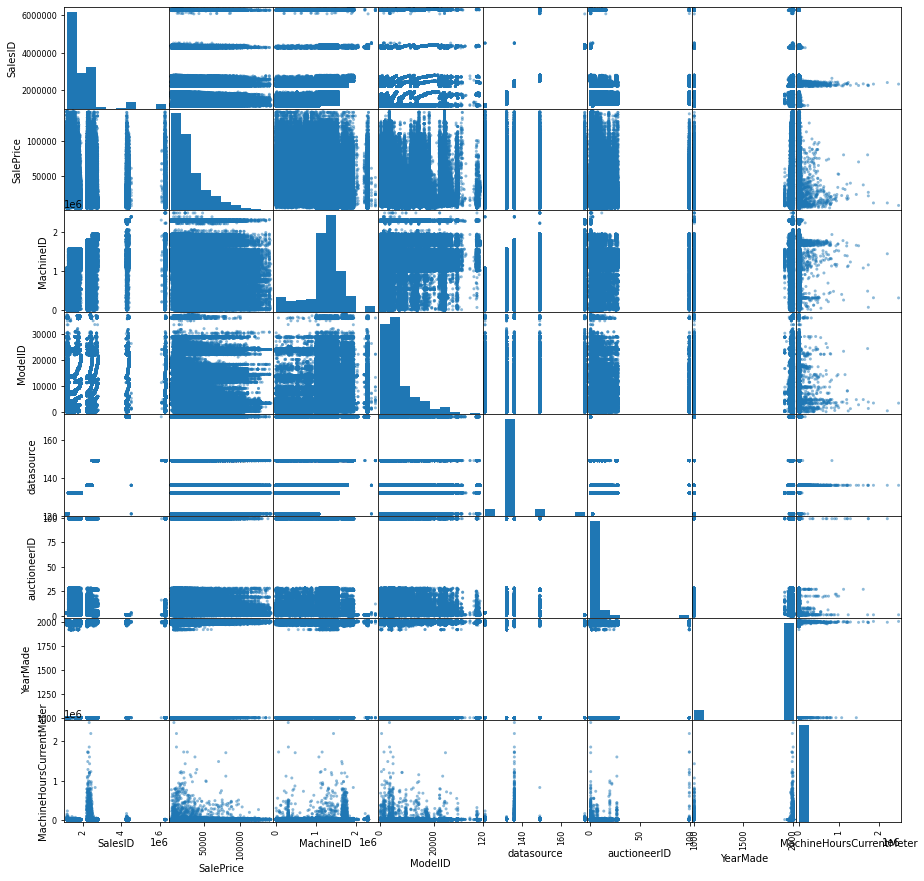

In [6]:
plot= pd.plotting.scatter_matrix(df_train, alpha=0.5, figsize=(15,15));

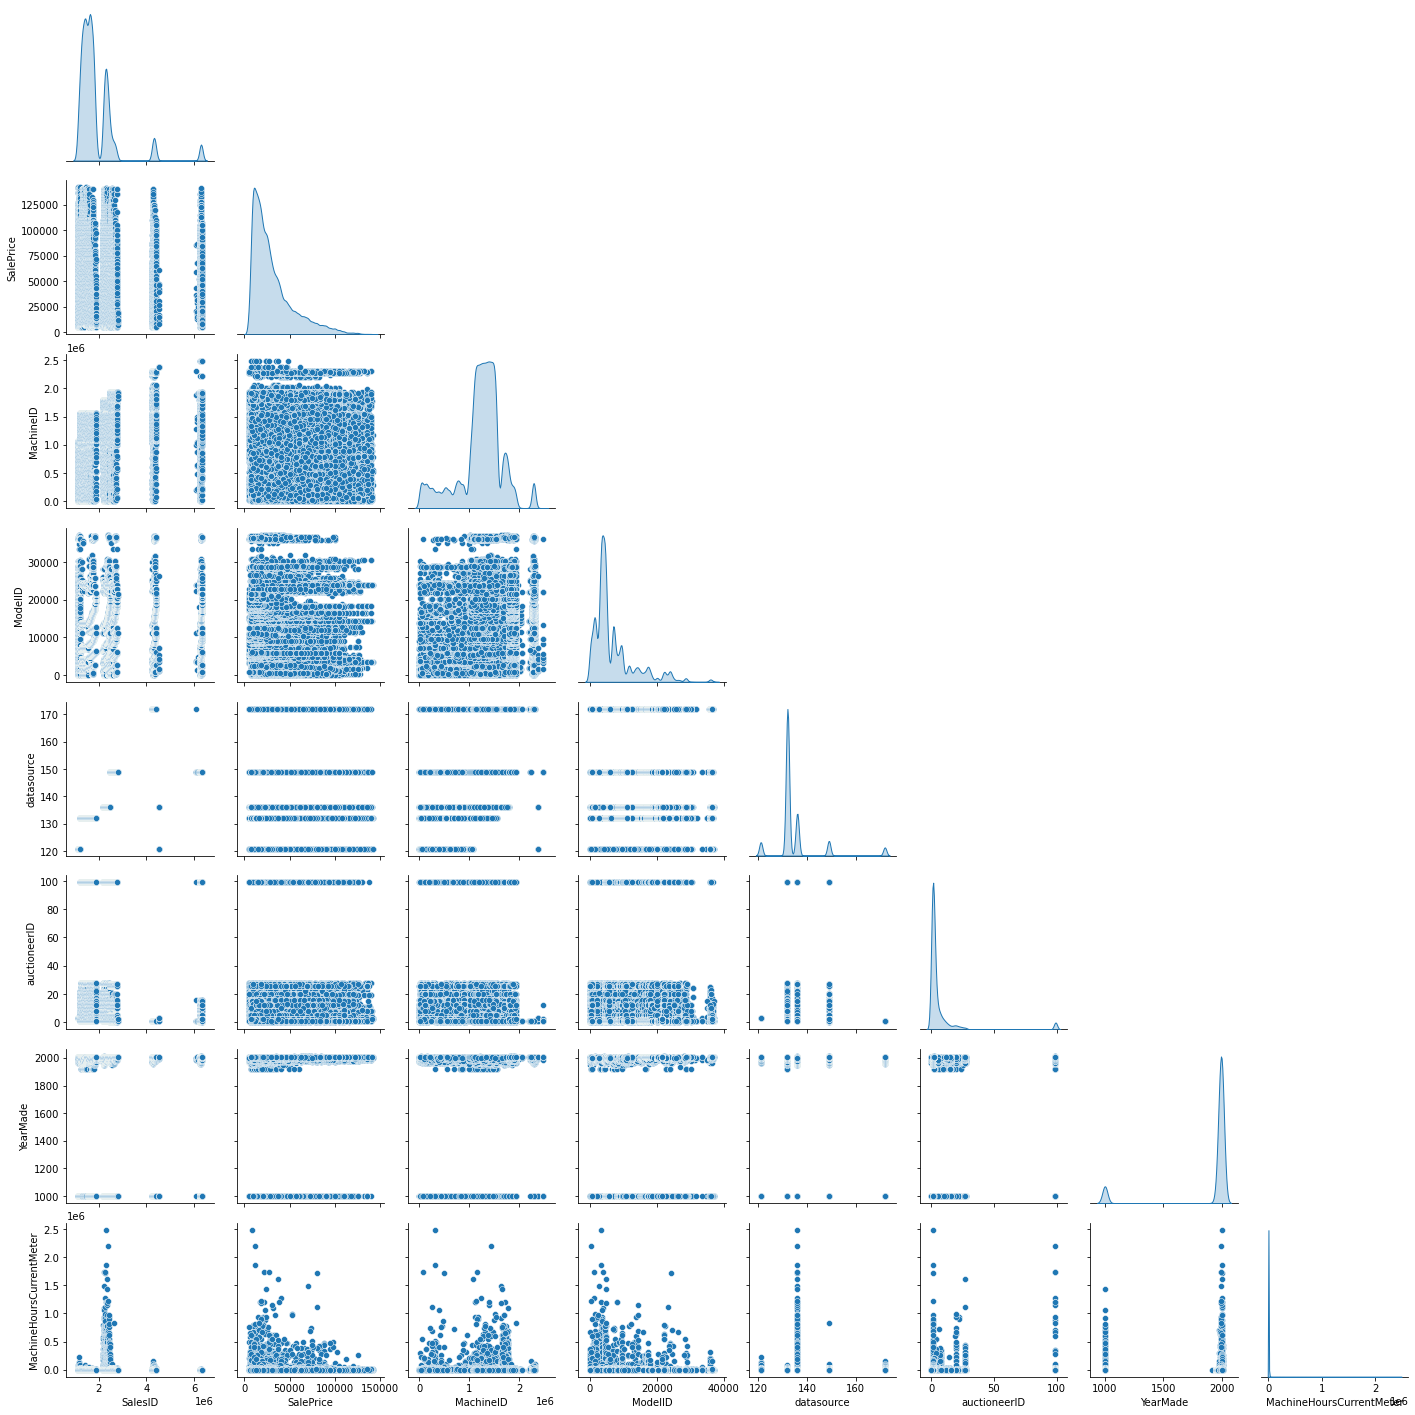

In [7]:
sns.pairplot(df_train, corner=True, diag_kind='kde')

In [8]:
df_train = df_train.drop(columns=['MachineID', 'ModelID', 'auctioneerID', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelDescriptor', 'fiModelSeries','ProductGroup', 'ProductGroupDesc', 'fiProductClassDesc', 'fiModelDesc'])

In [9]:
df_train['MachineHoursCurrentMeter'] = df_train['MachineHoursCurrentMeter'].fillna(value=0)

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')

In [11]:
DO3 = df_train["saledate"].str.split(" ", n = 1, expand = True)
df_train["saledate"]= DO3[0]

In [12]:
df_train.saledate.unique()

array(['11/16/2006', '3/26/2004', '2/26/2004', ..., '10/29/2011',
       '11/12/2011', '12/10/2011'], dtype=object)

In [13]:
df_train["saledate"] = pd.to_datetime(df_train["saledate"])
df_train["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [14]:
df_train['saledate']=pd.to_datetime(df_train['saledate'].astype(str), format='%Y/%m/%d')

In [15]:
df_train['saledate'] = pd.to_datetime(df_train['saledate']).astype(np.int64)

In [16]:
df_train.saledate.unique()

array([1163635200000000000, 1080259200000000000, 1077753600000000000, ...,
       1319846400000000000, 1321056000000000000, 1323475200000000000],
      dtype=int64)

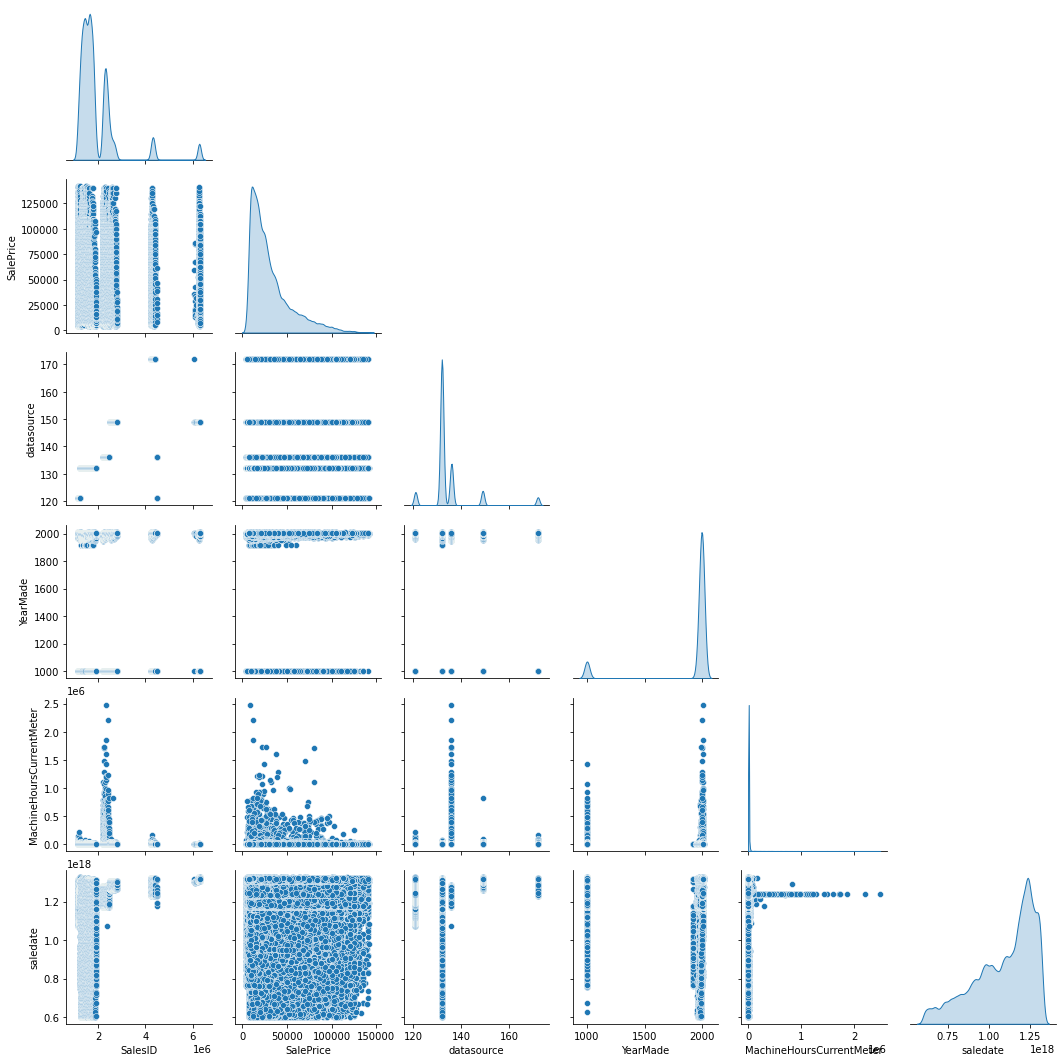

In [17]:
sns.pairplot(df_train, corner=True, diag_kind='kde')

In [18]:
df_train_categorical = df_train.drop(columns=['SalesID', 'SalePrice', 'datasource', 'YearMade', 'MachineHoursCurrentMeter', 'saledate'])

In [19]:
df_train_categorical.head()

,UsageBand,fiModelDesc,ProductSize,state,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,Low,521D,NaN,Alabama,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,Low,950FII,Medium,North Carolina,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,High,226,NaN,New York,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,High,PC120-6E,Small,Texas,NaN,EROPS w AC,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medium,S175,NaN,New York,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


enc.fit(df_train_categorical)

enc.categories_

enc.transform(df_train_categorical).toarray()

In [ ]:
df_train.isna().sum()

In [ ]:
df_train.head()

In [ ]:
df_train[['Four Wheel Drive', 'Two Wheel Drive', 'No',
       'All Wheel Drive']] = pd.get_dummies(df_train.Drive_System)

In [ ]:
df_train.Enclosure.unique()

In [ ]:
df_train[['EROPS w AC', 'OROPS', 'EROPS','EROPS AC', 'NO ROPS',
       'None or Unspecified']] = pd.get_dummies(df_train.Enclosure)

In [ ]:
df_train.UsageBand.unique()

In [ ]:
df_train[['Low', 'High', 'Medium']] = pd.get_dummies(df_train.UsageBand)

In [ ]:
df_train.ProductSize.unique()

In [ ]:
df_train.Drive_System.unique()

In [ ]:
df_train.Enclosure.unique()

In [ ]:
df_train.Forks.unique()

In [ ]:
df_train.Pad_Type.unique()

In [ ]:
df_train.Ride_Control.unique()

In [ ]:
df_train.Stick.unique()

In [ ]:
df_train.Transmission.unique()

In [ ]:
df_train.Turbocharged.unique()

In [ ]:
df_train.Blade_Extension.unique()

In [ ]:
df_train.Blade_Width.unique()

In [ ]:
df_train.Enclosure_Type.unique()

In [ ]:
df_train.Engine_Horsepower.unique()

In [ ]:
df_train.Hydraulics.unique()

In [ ]:
df_train.Pushblock.unique()

In [ ]:
df_train.Ripper.unique()

In [ ]:
df_train.Scarifier.unique()

In [ ]:
df_train.Tip_Control.unique()

In [ ]:
df_train.Tire_Size.unique()

In [ ]:
df_train.Coupler.unique()

In [ ]:
df_train.Coupler_System.unique()

In [ ]:
df_train.Grouser_Tracks.unique()

In [ ]:
df_train.Hydraulics_Flow.unique()

In [ ]:
df_train.Track_Type.unique()

In [ ]:
df_train.Undercarriage_Pad_Width.unique()

In [ ]:
df_train.Stick_Length.unique()

In [ ]:
df_train.Thumb.unique()

In [ ]:
df_train.Pattern_Changer.unique()

In [ ]:
df_train.Grouser_Type.unique()

In [ ]:
df_train.Backhoe_Mounting.unique()

In [ ]:
df_train.Blade_Type.unique()

In [ ]:
df_train.Travel_Controls.unique()

In [ ]:
df_train.Differential_Type.unique()

In [24]:
df_train.state.unique()

array(['Alabama', 'North Carolina', 'New York', 'Texas', 'Arizona',
       'Florida', 'Illinois', 'Oregon', 'Ohio', 'Arkansas', 'Wisconsin',
       'Kansas', 'Nevada', 'Iowa', 'Maine', 'Massachusetts', 'California',
       'Louisiana', 'Minnesota', 'New Hampshire', 'Idaho', 'Michigan',
       'Mississippi', 'Georgia', 'Missouri', 'South Carolina', 'Utah',
       'Tennessee', 'Washington', 'Virginia', 'South Dakota',
       'West Virginia', 'Oklahoma', 'Pennsylvania', 'Wyoming',
       'North Dakota', 'New Jersey', 'Kentucky', 'Montana', 'Alaska',
       'Nebraska', 'Maryland', 'Hawaii', 'Colorado', 'New Mexico',
       'Indiana', 'Connecticut', 'Delaware', 'Rhode Island', 'Vermont',
       'Washington DC', 'Puerto Rico', 'Unspecified'], dtype=object)

In [ ]:
df_train[['UB_Low', 'UB_High', 'UB_Medium']] = pd.get_dummies(df_train.UsageBand, prefix= 'UB')
df_train[['PS_Medium', 'PS_Small', 'PS_Large / Medium', 'PS_Mini', 'PS_Large', 'PS_Compact']] = pd.get_dummies(df_train.ProductSize, prefix="PS")
df_train[['State_Alabama', 'State_North Carolina', 'State_New York', 'State_Texas', 'State_Arizona',
       'State_Florida', 'State_Illinois', 'State_Oregon', 'State_Ohio', 'State_Arkansas', 'State_Wisconsin',
       'State_Kansas', 'State_Nevada', 'State_Iowa', 'State_Maine', 'State_Massachusetts', 'State_California',
       'State_Louisiana', 'State_Minnesota', 'State_New Hampshire', 'State_Idaho', 'State_Michigan',
       'State_Mississippi', 'State_Georgia', 'State_Missouri', 'State_South Carolina', 'State_Utah',
       'State_Tennessee', 'State_Washington', 'State_Virginia', 'State_South Dakota',
       'State_West Virginia', 'State_Oklahoma', 'State_Pennsylvania', 'State_Wyoming',
       'State_North Dakota', 'State_New Jersey', 'State_Kentucky', 'State_Montana', 'State_Alaska',
       'State_Nebraska', 'State_Maryland', 'State_Hawaii', 'State_Colorado', 'State_New Mexico',
       'State_Indiana', 'State_Connecticut', 'State_Delaware', 'State_Rhode Island', 'State_Vermont',
       'State_Washington DC', 'State_Puerto Rico', 'State_Unspecified']] = pd.get_dummies(df_train.state, prefix="State")
df_train[['DS_Four Wheel Drive', 'DS_Two Wheel Drive', 'DS_No',
       'DS_All Wheel Drive']] = pd.get_dummies(df_train.Drive_System, prefix='DS')
df_train[['En_EROPS w AC', 'OROPS', 'En_EROPS','En_EROPS AC', 'En_NO ROPS','None or Unspecified']] = pd.get_dummies(df_train.Enclosure, prefix="En")
df_train[['Forks_None or Unspecified','Forks_Yes']] = pd.get_dummies(df_train.Forks, prefix="Forks")
df_train[['PadT_None or Unspecified', 'PadT_Reversible', 'PadT_Street', 'PadT_Grouser']] = pd.get_dummies(df_train.Pad_Type, prefix="PadT_")
df_train[['RideC_None or Unspecified','RideC_No', 'RideC_Yes']] = pd.get_dummies(df_train.Ride_Control, prefix="RideC_")
df_train[['Stick_Extended', 'Stick_Standard']] = pd.get_dummies(df_train.Stick, prefix="Stick")
df_train[['Transmission_Powershuttle', 'Transmission_Standard', 'Transmission_Powershift', 'Transmission_None or Unspecified', 'Transmission_Hydrostatic', 'Transmission_Autoshift', 'Transmission_Direct Drive','Transmission_AutoShift']] = pd.get_dummies(df_train.Transmission, prefix="Transmission")
df_train[['Turboc_None or Unspecified', 'Turboc_Yes']] = pd.get_dummies(df_train.Turbocharged, prefix="Turboc")
df_train[['BladeExt_Yes', 'BladeExt_None or Unspecified']] = pd.get_dummies(df_train.Blade_Extension, prefix="BladeExt")
df_train[['BladeW_None or Unspecified', "BladeW_12'", "BladeW_14'", "BladeW_13'", "BladeW_16'", "BladeW_<12'"]] = pd.get_dummies(df_train.Blade_Width, prefix="BladeW")
df_train[['EnType_None or Unspecified', 'EnType_Low Profile', 'EnType_High Profile']] = pd.get_dummies(df_train.Enclosure_Type, prefix="EnType")
df_train[['Horsepower_No', 'Horsepower_Variable']] = pd.get_dummies(df_train.Engine_Horsepower, prefix="Horsepower")
df_train[['H_2 Valve', 'H_Auxiliary', 'H_Standard', 'H_Base + 1 Function','H_Base + 3 Function', 'H_4 Valve', '3 Valve', 'H_Base + 2 Function','H_Base + 4 Function', 'H_None or Unspecified', 'H_Base + 5 Function','H_Base + 6 Function']] = pd.get_dummies(df_train.Hydraulics, prefix="H")
df_train[['Pushblock_None or Unspecified', 'Pushblock_Yes']] = pd.get_dummies(df_train.Pushblock, prefix="Pushblock")
df_train[['Ripper_None or Unspecified', 'Ripper_Yes', 'Ripper_Single Shank', 'Ripper_Multi Shank']] = pd.get_dummies(df_train.Ripper, prefix="Ripper")
df_train[['Scarifier_Yes', 'Scarifier_None or Unspecified']] = pd.get_dummies(df_train.Scarifier, prefix="Scarifier")
df_train[['TipC_Sideshift & Tip', 'TipC_None or Unspecified', 'TipC_Tip']] = pd.get_dummies(df_train.Tip_Control, prefix="TipC")
df_train[['TireS_None or Unspecified', 'TireS_23.5', 'TireS_13"', 'TireS_26.5', 'TireS_29.5', 'TireS_14"','TireS_20.5', 'TireS_17.5"', 'TireS_15.5"', 'TireS_20.5"', 'TireS_17.5', 'TireS_7.0"', 'TireS_15.5', 'TireS_23.5"', 'TireS_10"', 'TireS_23.1"', 'TireS_10 inch']] = pd.get_dummies(df_train.Tire_Size,  prefix="TireS")
df_train[['Coupler_None or Unspecified', 'Coupler_Manual', 'Coupler_Hydraulic']] = pd.get_dummies(df_train.Coupler, prefix="Coupler")
df_train[['CouplerSys_None or Unspecified', 'CouplerSys_Yes']] = pd.get_dummies(df_train.Coupler_System, prefix="CouplerSys")
df_train[['GrouserT_None or Unspecified', 'GrouserT_Yes']] = pd.get_dummies(df_train.Grouser_Tracks,  prefix="GrouserT")
df_train[['HyFlow_Standard', 'HyFlow_High Flow', 'HyFlow_None or Unspecified']] = pd.get_dummies(df_train.Hydraulics_Flow, prefix="HyFlow")
df_train[['TrackType_Steel', 'TrackType_Rubber']] = pd.get_dummies(df_train.Track_Type, prefix="TrackType")
df_train[['UPW_None or Unspecified', 'UPW_16 inch', 'UPW_32 inch', 'UPW_28 inch','UPW_30 inch', 'UPW_22 inch', 'UPW_24 inch', 'UPW_18 inch', 'UPW_36 inch', 'UPW_20 inch','UPW_27 inch', 'UPW_15 inch', 'UPW_26 inch', 'UPW_34 inch', 'UPW_33 inch', 'UPW_14 inch','UPW_31 inch', 'UPW_25 inch', 'UPW_31.5 inch']] = pd.get_dummies(df_train.Undercarriage_Pad_Width, prefix="UPW")
df_train[['StickL_None or Unspecified', 'StickL_11\' 0"', 'StickL_15\' 9"', 'StickL_10\' 2"','StickL_10\' 6"', 'StickL_9\' 10"', 'StickL_10\' 10"', 'StickL_9\' 6"', 'StickL_9\' 7"', 'StickL_12\' 8"','StickL_8\' 2"', 'StickL_8\' 6"', 'StickL_9\' 8"', 'StickL_12\' 10"', 'StickL_11\' 10"', 'StickL_8\' 10"','StickL_8\' 4"', 'StickL_12\' 4"', 'StickL_9\' 5"', 'StickL_6\' 3"', 'StickL_14\' 1"', 'StickL_13\' 7"','StickL_13\' 10"', 'StickL_13\' 9"', 'StickL_7\' 10"', 'StickL_15\' 4"', 'StickL_9\' 2"', 'StickL_24\' 3"','StickL_19\' 8"']] = pd.get_dummies(df_train.Stick_Length,  prefix="StickL")
df_train[['Thumb_None or Unspecified', 'Thumb_Hydraulic', 'Thumb_Manual']] = pd.get_dummies(df_train.Thumb, prefix="Thumb")
df_train[['PatternCh_None or Unspecified', 'PatternCh_Yes', 'PatternCh_No']] = pd.get_dummies(df_train.Pattern_Changer, prefix="PatternCh")
df_train[['GrouserType_Double', 'GrouserType_Triple', 'GrouserType_Single']] = pd.get_dummies(df_train.Grouser_Type,  prefix="GrouserType")
df_train[['Backhoe_None or Unspecified', 'Backhoe_Yes']] = pd.get_dummies(df_train.Backhoe_Mounting, prefix="Backhoe")
df_train[['BladeTy_PAT', 'BladeTy_None or Unspecified', 'BladeTy_Semi U', 'BladeTy_VPAT', 'BladeTy_Straight','BladeTy_Angle', 'BladeTy_No', 'BladeTy_U', 'BladeTy_Landfill', 'BladeTy_Coal']] = pd.get_dummies(df_train.Blade_Type, prefix="BladeTy")
df_train[['TravelControls_None or Unspecified', 'TravelControls_Differential Steer', 'TravelControls_Lever','TravelControls_Finger Tip', 'TravelControls_2 Pedal', 'TravelControls_Pedal', 'TravelControls_1 Speed']] = pd.get_dummies(df_train.Travel_Controls, prefix="TravelControls")
df_train[['DifT_Standard', 'DifT_Limited Slip', 'DifT_No Spin', 'DifT_Locking']] = pd.get_dummies(df_train.Differential_Type, prefix="DifT")
df_train[['SteeringCon_Conventional', 'SteeringCon_Command Control', 'SteeringCon_Four Wheel Standard','SteeringCon_Wheel', 'SteeringCon_No']] = pd.get_dummies(df_train.Steering_Controls, prefix="SteeringCon")

In [ ]:
df_train.isna().sum()

In [ ]:
df_train.info()

In [ ]:
df_train = df_train.drop(columns=['fiProductClassDesc', 'state','UsageBand', 'saledate', 'fiModelDesc', 'Drive_System' , 'Enclosure' , 'Forks' , 'Pad_Type' , 'Ride_Control' , 'Stick' , 'Transmission' , 'Turbocharged' , 'Blade_Extension' , 'Blade_Width' , 'Enclosure_Type' , 'Engine_Horsepower' , 'Hydraulics' , 'Pushblock' , 'Ripper' , 'Scarifier' , 'Tip_Control' , 'Tire_Size' , 'Coupler' , 'Coupler_System' , 'Grouser_Tracks' , 'Hydraulics_Flow' , 'Track_Type' , 'Undercarriage_Pad_Width' , 'Stick_Length' , 'Thumb' , 'Pattern_Changer' , 'Grouser_Type' , 'Backhoe_Mounting' , 'Blade_Type' , 'Travel_Controls' , 'Differential_Type' , 'Steering_Controls' , 
])

In [ ]:
columnslist = pd.DataFrame(df_train.isna().sum())

In [ ]:
columnslist

In [ ]:
df_train = df_train.drop(columns=['ProductSize'])

In [ ]:
y_train = df_train['SalePrice']
X_train = df_train.iloc[:,1:]

In [ ]:
y_train.head()

In [ ]:
X_train.head()

In [ ]:
df_test = pd.read_csv('test/test.csv')
df_test.head

In [ ]:
df_test['MachineHoursCurrentMeter'] = df_test['MachineHoursCurrentMeter'].fillna(value=0)

In [ ]:
df_test = df_test.drop(columns=['fiProductClassDesc', 'state','auctioneerID', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelDescriptor', 'fiModelSeries','ProductGroup', 'ProductGroupDesc'])

In [ ]:
df_test[['Four Wheel Drive', 'Two Wheel Drive', 'No','All Wheel Drive']] = pd.get_dummies(df_test.Drive_System)

In [ ]:
df_test[['Low', 'High', 'Medium']] = pd.get_dummies(df_test.UsageBand)

In [ ]:
df_test.isna().sum()

In [ ]:
df_test.Enclosure.unique()

In [ ]:
df_test[['PS_Medium', 'PS_Small', 'PS_Large / Medium', 'PS_Mini', 'PS_Large','PS_Compact']] = pd.get_dummies(df_test.ProductSize, prefix="PS")
df_test[['En_EROPS', 'En_EROPS w AC', 'En_OROPS','En_EROPS AC']] = pd.get_dummies(df_test.Enclosure, prefix="En")
df_test[['Forks_None or Unspecified','Forks_Yes']] = pd.get_dummies(df_test.Forks, prefix="Forks")
df_test[['PadT_None or Unspecified','PadT_Street','PadT_Reversible','PadT_Grouser']] = pd.get_dummies(df_test.Pad_Type, prefix="PadT_")
df_test[['RideC_None or Unspecified','RideC_No', 'RideC_Yes']] = pd.get_dummies(df_test.Ride_Control, prefix="RideC_")
df_test[['Stick_Extended', 'Stick_Standard']] = pd.get_dummies(df_test.Stick, prefix="Stick")
df_test[['Transmission_None or Unspecified','Transmission_Hydrostatic', 'Transmission_Powershift', 'Transmission_Standard', 'Transmission_Powershuttle', 'Transmission_Direct Drive' ,'Transmission_AutoShift']] = pd.get_dummies(df_test.Transmission, prefix="Transmission")
df_test[['Turboc_None or Unspecified', 'Turboc_Yes']] = pd.get_dummies(df_test.Turbocharged, prefix="Turboc")
df_test[['BladeExt_None or Unspecified', 'BladeExt_Yes']] = pd.get_dummies(df_test.Blade_Extension, prefix="BladeExt")
df_test[["BladeW_14'","BladeW_12'", 'BladeW_None or Unspecified',"BladeW_16'", "BladeW_13'","BladeW_<12'"]] = pd.get_dummies(df_test.Blade_Width, prefix="BladeW")
df_test[['EnType_High Profile', 'EnType_None or Unspecified', 'EnType_Low Profile']] = pd.get_dummies(df_test.Enclosure_Type, prefix="EnType")
df_test[['Horsepower_No', 'Horsepower_Variable']] = pd.get_dummies(df_test.Engine_Horsepower, prefix="Horsepower")
df_test[['H_Standard', 'H_Auxiliary', 'H_2 Valve','H_Base + 1 Function','3 Valve', 'H_4 Valve','H_Base + 3 Function', 'H_Base + 4 Function','H_Base + 5 Function','H_Base + 2 Function', 'H_Base + 6 Function']] = pd.get_dummies(df_test.Hydraulics, prefix="H")
df_test[['Pushblock_None or Unspecified', 'Pushblock_Yes']] = pd.get_dummies(df_test.Pushblock, prefix="Pushblock")
df_test[['Ripper_None or Unspecified', 'Ripper_Yes', 'Ripper_Single Shank', 'Ripper_Multi Shank']] = pd.get_dummies(df_test.Ripper, prefix="Ripper")
df_test[['Scarifier_Yes', 'Scarifier_None or Unspecified']] = pd.get_dummies(df_test.Scarifier, prefix="Scarifier")
df_test[['TipC_None or Unspecified', 'TipC_Tip', 'TipC_Sideshift & Tip']] = pd.get_dummies(df_test.Tip_Control, prefix="TipC")
df_test[['TireS_20.5', 'TireS_23.5', 'TireS_17.5"', 'TireS_None or Unspecified', 'TireS_13"', 'TireS_14"', 'TireS_29.5', 'TireS_26.5', 'TireS_20.5"', 'TireS_15.5"', 'TireS_17.5', 'TireS_15.5', 'TireS_23.5"', 'TireS_7.0"', 'TireS_10"']] = pd.get_dummies(df_test.Tire_Size,  prefix="TireS")
df_test[['Coupler_None or Unspecified', 'Coupler_Hydraulic', 'Coupler_Manual']] = pd.get_dummies(df_test.Coupler, prefix="Coupler")
df_test[['CouplerSys_Yes', 'CouplerSys_None or Unspecified']] = pd.get_dummies(df_test.Coupler_System, prefix="CouplerSys")
df_test[['GrouserT_None or Unspecified', 'GrouserT_Yes']] = pd.get_dummies(df_test.Grouser_Tracks,  prefix="GrouserT")
df_test[['HyFlow_Standard', 'HyFlow_High Flow', 'HyFlow_None or Unspecified']] = pd.get_dummies(df_test.Hydraulics_Flow, prefix="HyFlow")
df_test[['TrackType_Steel', 'TrackType_Rubber']] = pd.get_dummies(df_test.Track_Type, prefix="TrackType")
df_test[['UPW_None or Unspecified', 'UPW_20 inch', 'UPW_18 inch', 'UPW_31 inch','UPW_28 inch', 'UPW_16 inch', 'UPW_30 inch', 'UPW_32 inch', 'UPW_14 inch', 'UPW_36 inch', 'UPW_24 inch', 'UPW_34 inch', 'UPW_22 inch', 'UPW_33 inch', 'UPW_27 inch', 'UPW_26 inch']] = pd.get_dummies(df_test.Undercarriage_Pad_Width, prefix="UPW")
df_test[['StickL_None or Unspecified', 'StickL_12\' 4"', 'StickL_9\' 10"', 'StickL_9\' 8"', 'StickL_10\' 10"', 'StickL_9\' 6"', 'StickL_12\' 10"', 'StickL_6\' 3"', 'StickL_10\' 2"', 'StickL_9\' 7"', 'StickL_10\' 6"', 'StickL_8\' 2"', 'StickL_11\' 0"', 'StickL_8\' 6"', 'StickL_12\' 8"', 'StickL_11\' 10"','StickL_13\' 10"', 'StickL_8\' 4"', 'StickL_8\' 10"', 'StickL_15\' 9"', 'StickL_13\' 7"']] = pd.get_dummies(df_test.Stick_Length,  prefix="StickL")
df_test[['Thumb_None or Unspecified', 'Thumb_Hydraulic', 'Thumb_Manual']] = pd.get_dummies(df_test.Thumb, prefix="Thumb")
df_test[['PatternCh_None or Unspecified', 'PatternCh_Yes', 'PatternCh_No']] = pd.get_dummies(df_test.Pattern_Changer, prefix="PatternCh")
df_test[['GrouserType_Double', 'GrouserType_Triple']] = pd.get_dummies(df_test.Grouser_Type,  prefix="GrouserType")
df_test[['Backhoe_None or Unspecified']] = pd.get_dummies(df_test.Backhoe_Mounting, prefix="Backhoe")
df_test[['BladeTy_PAT', 'BladeTy_None or Unspecified', 'BladeTy_U', 'BladeTy_VPAT', 'BladeTy_Landfill', 'BladeTy_Semi U', 'BladeTy_Straight', 'BladeTy_Angle']] = pd.get_dummies(df_test.Blade_Type, prefix="BladeTy")
df_test[['TravelControls_None or Unspecified', 'TravelControls_Lever', 'TravelControls_Finger Tip', 'TravelControls_Differential Steer', 'TravelControls_1 Speed', 'TravelControls_Pedal', 'TravelControls_2 Pedal']] = pd.get_dummies(df_test.Travel_Controls, prefix="TravelControls")
df_test[['DifT_Standard', 'DifT_Limited Slip', 'DifT_No Spin']] = pd.get_dummies(df_test.Differential_Type, prefix="DifT")
df_test[['SteeringCon_Conventional', 'SteeringCon_Command Control', 'SteeringCon_Four Wheel Standard']] = pd.get_dummies(df_test.Steering_Controls, prefix="SteeringCon")

In [ ]:
df_test.head()

In [ ]:
df_test = df_test.drop(columns=['ProductSize', 'Drive_System' , 'Enclosure' , 'Forks' , 'Pad_Type' , 'Ride_Control' , 'Stick' , 'Transmission' , 'Turbocharged' , 'Blade_Extension' , 'Blade_Width' , 'Enclosure_Type' , 'Engine_Horsepower' , 'Hydraulics' , 'Pushblock' , 'Ripper' , 'Scarifier' , 'Tip_Control' , 'Tire_Size' , 'Coupler' , 'Coupler_System' , 'Grouser_Tracks' , 'Hydraulics_Flow' , 'Track_Type' , 'Undercarriage_Pad_Width' , 'Stick_Length' , 'Thumb' , 'Pattern_Changer' , 'Grouser_Type' , 'Backhoe_Mounting' , 'Blade_Type' , 'Travel_Controls' , 'Differential_Type' , 'Steering_Controls' , 'SalesID' ])

In [ ]:
X_train.head()

In [ ]:
#KNN
knn= KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
#LinearRegression
lir= LinearRegression().fit(X_train, y_train)

In [ ]:
#Lasso
lasso= Lasso().fit(X_train, y_train)

In [ ]:
#Ridge
ri= Ridge().fit(X_train, y_train)

In [ ]:
#ElasticNet
en= ElasticNet().fit(X_train, y_train)

#LogisticRegression
lor= LogisticRegression()
lor.fit(X_train, y_train)

In [ ]:
price = pd.read_csv('ground_truth/test_actual.csv')
price.head()